In [ ]:
!pip install pandas_profiling
!pip install sweetviz

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [3]:
df = pd.read_csv(r"C:\Users\Pratik\Downloads\temperature_data.csv")
df

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998065,-0.047497,0.341638,0.331475,-1.246114,-1.222428,-0.255640,1.029142,-0.245723,0.429853,1.018568,0.836084,0.494725,72
998066,-0.048839,0.320022,0.331701,-1.250655,-1.222437,-0.255640,1.029148,-0.245736,0.429751,1.013416,0.834438,0.494279,72
998067,-0.042350,0.307415,0.330946,-1.246852,-1.222430,-0.255640,1.029191,-0.245701,0.429439,1.002906,0.833936,0.492666,72
998068,-0.039433,0.302082,0.330987,-1.249505,-1.222432,-0.255640,1.029147,-0.245727,0.429558,0.999157,0.830504,0.490581,72


# Data Preprocessing

In [4]:
df.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding',
       'profile_id'],
      dtype='object')

In [5]:
#By observing the data column 'profile_id' was not playing the major role se gonna remove it...
df.drop(df.columns[[12]], axis = 1, inplace = True)
df

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145
...,...,...,...,...,...,...,...,...,...,...,...,...
998065,-0.047497,0.341638,0.331475,-1.246114,-1.222428,-0.255640,1.029142,-0.245723,0.429853,1.018568,0.836084,0.494725
998066,-0.048839,0.320022,0.331701,-1.250655,-1.222437,-0.255640,1.029148,-0.245736,0.429751,1.013416,0.834438,0.494279
998067,-0.042350,0.307415,0.330946,-1.246852,-1.222430,-0.255640,1.029191,-0.245701,0.429439,1.002906,0.833936,0.492666
998068,-0.039433,0.302082,0.330987,-1.249505,-1.222432,-0.255640,1.029147,-0.245727,0.429558,0.999157,0.830504,0.490581


# Basic Infromation about the data -EDA(Exploratory Data Analysis)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
dtypes: float64(12)
memory usage: 91.4 MB


In [7]:
df.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,-0.003905,0.004723,0.004780,-0.005690,-0.006336,-0.003333,0.006043,-0.003194,-0.004396,0.000609,-0.002208,-0.003935
std,0.993127,1.002423,0.997878,1.002330,1.001229,0.997907,0.998994,0.997912,0.995686,1.001049,0.999597,0.998343
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973
25%,-0.599385,-1.037925,-0.826359,-0.927390,-0.951892,-0.266917,-0.756296,-0.257269,-0.672308,-0.747265,-0.761951,-0.725622
50%,0.266157,-0.177187,0.267542,-0.099818,-0.140246,-0.187246,0.213935,-0.190076,0.094367,-0.057226,0.005085,0.006536
75%,0.686675,0.650709,0.358491,0.852625,0.853584,0.547171,1.013975,0.499260,0.680691,0.697344,0.772239,0.725660
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781


In [8]:
df.shape

(998070, 12)

In [9]:
df.count()

ambient           998070
coolant           998070
u_d               998070
u_q               998070
motor_speed       998070
torque            998070
i_d               998070
i_q               998070
pm                998070
stator_yoke       998070
stator_tooth      998070
stator_winding    998070
dtype: int64

In [10]:
#checking the null values 
df.isnull().sum()

#So there are no nyll values in the data

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
dtype: int64

In [11]:
df.mean()

ambient          -0.003905
coolant           0.004723
u_d               0.004780
u_q              -0.005690
motor_speed      -0.006336
torque           -0.003333
i_d               0.006043
i_q              -0.003194
pm               -0.004396
stator_yoke       0.000609
stator_tooth     -0.002208
stator_winding   -0.003935
dtype: float64

In [12]:
df.median()

ambient           0.266157
coolant          -0.177187
u_d               0.267542
u_q              -0.099818
motor_speed      -0.140246
torque           -0.187246
i_d               0.213935
i_q              -0.190076
pm                0.094367
stator_yoke      -0.057226
stator_tooth      0.005085
stator_winding    0.006536
dtype: float64

In [13]:
df.mode()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,0.688609,1.747555,0.310133,-1.277628,-1.22243,-0.25564,1.029142,0.48692,1.450126,-0.397535,0.461858,1.261606


In [14]:
#checking the correlation respect to the data
df.corr()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
ambient,1.000000,0.434435,0.194754,0.087430,0.078283,-0.262264,0.005605,-0.260562,0.501496,0.451616,0.396742,0.301883
coolant,0.434435,1.000000,0.178708,0.027851,-0.033332,-0.189617,0.108489,-0.186060,0.430548,0.874037,0.689003,0.509298
u_d,0.194754,0.178708,1.000000,-0.027472,-0.233828,-0.821325,0.358517,-0.796586,-0.082564,0.041428,-0.066256,-0.150714
u_q,0.087430,0.027851,-0.027472,1.000000,0.716897,-0.037262,-0.181855,-0.026348,0.101236,0.106186,0.149017,0.125445
motor_speed,0.078283,-0.033332,-0.233828,0.716897,1.000000,0.024517,-0.722914,0.006323,0.332419,0.182564,0.333909,0.393154
torque,-0.262264,-0.189617,-0.821325,-0.037262,0.024517,1.000000,-0.239059,0.996560,-0.072905,-0.092207,-0.011055,0.080981
i_d,0.005605,0.108489,0.358517,-0.181855,-0.722914,-0.239059,1.000000,-0.204230,-0.299227,-0.179903,-0.387712,-0.539924
i_q,-0.260562,-0.186060,-0.796586,-0.026348,0.006323,0.996560,-0.204230,1.000000,-0.086486,-0.098753,-0.025191,0.060949
pm,0.501496,0.430548,-0.082564,0.101236,0.332419,-0.072905,-0.299227,-0.086486,1.000000,0.695014,0.768352,0.729561
stator_yoke,0.451616,0.874037,0.041428,0.106186,0.182564,-0.092207,-0.179903,-0.098753,0.695014,1.000000,0.949898,0.845144


In [15]:
corr_matrix = df.corr()

In [16]:
#checking the unique values in data
df['motor_speed'].unique()

array([-1.2224282, -1.2224293, -1.2224278, ..., -1.2217995, -1.2221036,
       -1.2221992])

In [17]:
df['pm'].unique()

array([-2.522071  , -2.5224178 , -2.5226731 , ...,  0.4294391 ,
        0.42955777,  0.4291662 ])

In [18]:
df['i_d'].unique()

array([1.0295724, 1.029509 , 1.0294477, ..., 1.0287862, 1.028883 ,
       1.0290074])

In [19]:
df['i_q'].unique()

array([-0.24586003, -0.24583231, -0.24581794, ..., -0.2458262 ,
       -0.24577925, -0.24577576])

In [20]:
#Hence there are unique values in data which are presented over here....

# Data Visualization:

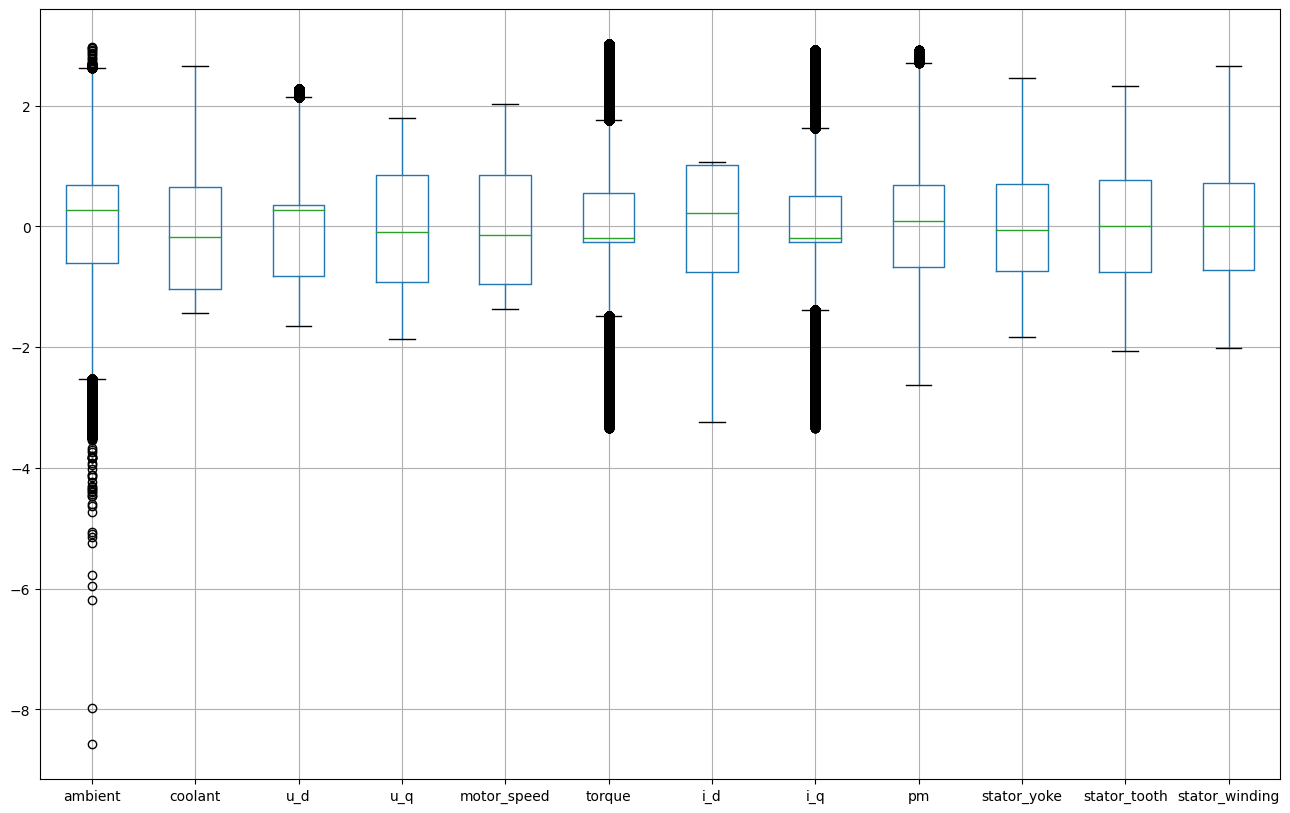

In [21]:
#Boxplot of the overall data
boxplot=df.boxplot(figsize=(16,10))

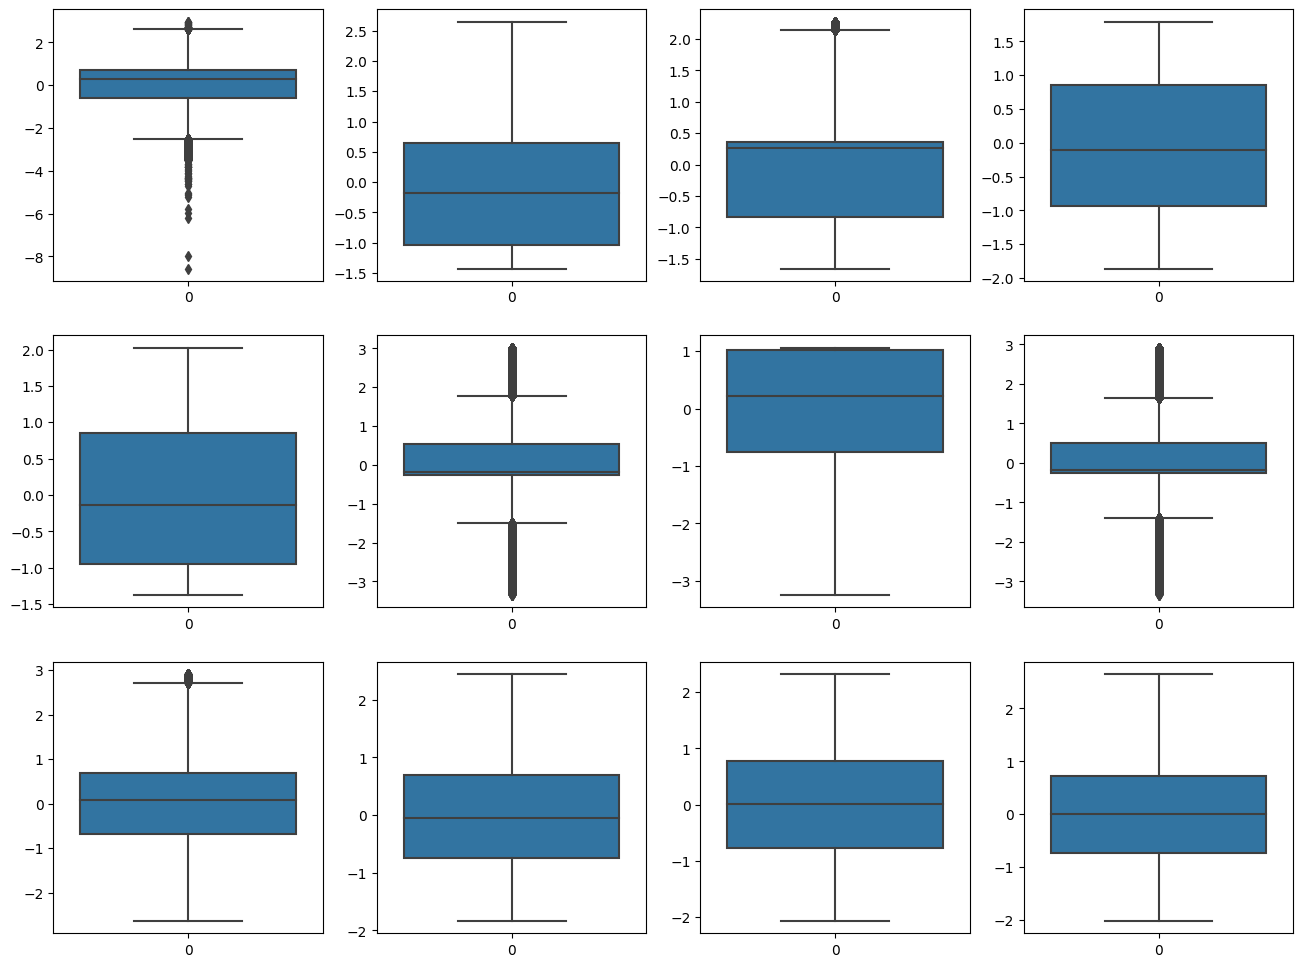

In [22]:
#plotting_the_boxplot
plt.figure(figsize=(16,12))
for i in range (len(df.columns)):
    plt.subplot(3,4, i+1)
    sns.boxplot(df[df.columns[i]])
plt.show()

In [23]:
#As we observe there are outliers in the data like columns 'ambient,u_d,i_q,torque,pm' .So we're removing it..
#AMBIENT
q1=df.ambient.quantile(0.25)
q3=df.ambient.quantile(0.75)
iqr=q3-q1
iqr

1.28606059

In [24]:
ub=q3+1.5*iqr
ub

2.615766135

In [25]:
lb=q1-1.5*iqr
lb

-2.528476225

In [26]:
#visualizing_the_outliers
sns.boxplot(df['ambient'])

<AxesSubplot:>

In [27]:
df.loc[df['ambient']>=2.6,'ambient']=2.6
df.loc[df['ambient']<=-2.5,'ambient']=-2.5

In [28]:
#removed outliers
sns.boxplot(df['ambient'])

<AxesSubplot:>

In [29]:
#torque
q1=df.torque.quantile(0.25)
q3=df.torque.quantile(0.75)
iqr=q3-q1
iqr

0.8140878475

In [30]:
ub=q3+1.5*iqr
ub

1.76830230875

In [31]:
lb=q1-1.5*iqr
lb

-1.48804908125

In [32]:
sns.boxplot(df['torque'])

<AxesSubplot:>

In [33]:
df.loc[df['torque']>=1.7,'torque']=1.7
df.loc[df['torque']<=-1.4,'torque']=-1.4

In [34]:
sns.boxplot(df['torque'])

<AxesSubplot:>

In [35]:
#i_q
q1=df.i_q.quantile(0.25)
q3=df.i_q.quantile(0.75)
iqr=q3-q1
iqr

0.756528935

In [36]:
ub=q3+1.5*iqr
ub

1.6340534075

In [37]:
lb=q1-1.5*iqr
lb

-1.3920623324999999

In [38]:
sns.boxplot(df['i_q'])

<AxesSubplot:>

In [39]:
df.loc[df['i_q']>=1.6,'i_q']=1.6
df.loc[df['i_q']<=-1.3,'i_q']=-1.3

In [40]:
sns.boxplot(df['i_q'])

<AxesSubplot:>

In [41]:
#pm
q1=df.pm.quantile(0.25)
q3=df.pm.quantile(0.75)
iqr=q3-q1
iqr

1.352998955

In [42]:
ub=q3+1.5*iqr
ub

2.7101898399999995

In [43]:
lb=q1-1.5*iqr
lb

-2.7018059799999996

In [44]:
sns.boxplot(df['pm'])

<AxesSubplot:>

In [45]:
df.loc[df['pm']>=2.7,'pm']=2.7
df.loc[df['pm']<=-2.7,'pm']=-2.7

In [46]:
sns.boxplot(df['pm'])

<AxesSubplot:>

In [47]:
#u_d
q1=df.u_d.quantile(0.25)
q3=df.u_d.quantile(0.75)
iqr=q3-q1
iqr

1.18484969

In [48]:
ub=q3+1.5*iqr
ub

2.13576555

In [49]:
lb=q1-1.5*iqr
lb

-2.60363321

In [50]:
sns.boxplot(df['u_d'])

<AxesSubplot:>

In [51]:
df.loc[df['u_d']>=2.1,'u_d']=2.1
df.loc[df['u_d']<=-2.6,'u_d']=-2.6

In [52]:
sns.boxplot(df['u_d'])

<AxesSubplot:>

In [54]:
#no outliers
df.boxplot(figsize=(12,6))
plt.show()

AssertionError: 1

In [ ]:
plt.figure(figsize=(16,16))
df.hist()
plt.show()

In [ ]:
#plotting_the_distance_plot
plt.figure(figsize=(16,12))
for i in range (len(df.columns)):
    plt.subplot(3,4, i+1)
    sns.distplot(df[df.columns[i]])
plt.show()

In [55]:
#pairplot
sns.pairplot(df.sample(100))

In [ ]:
#heatmap
plt.figure(figsize=(16,16))
sns.heatmap(data=corr_matrix , annot = True , vmin = 0)
plt.show()

In [ ]:
#normalization_of_the_data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df.values

In [ ]:
array = df.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:5])

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

In [ ]:
#creating_the_report
import pandas_profiling as pp
import sweetviz as sv

EDA_report= pp.ProfileReport(df)
EDA_report.to_file(output_file='report.html')

In [ ]:
sweet_report = sv.analyze(df)
sweet_report.show_html('report.html')

# MODEL BUILDING:

In [56]:
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X = df.drop(['motor_speed'], axis=1)
y = df['motor_speed']

In [59]:
X.head()

,ambient,coolant,u_d,u_q,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,-0.752143,-1.118446,0.327935,-1.297858,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033
1,-0.771263,-1.117021,0.329665,-1.297686,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631
2,-0.782892,-1.116681,0.332771,-1.301822,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343
3,-0.780935,-1.116764,0.333700,-1.301852,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632
4,-0.774043,-1.116775,0.335206,-1.303118,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145


In [60]:
y.head()

0   -1.222428
1   -1.222429
2   -1.222428
3   -1.222430
4   -1.222429
Name: motor_speed, dtype: float64

In [61]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
#by_using_the_standard_scaler mean=0 and Sd=1
scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# LINEAR REGERSSION

In [64]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [65]:
#Initializing_the_LINEAR_REGRESSION
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [66]:
#after building the model lets print the intercept and slope 
print(lm.intercept_)


print(lm.coef_)

-0.006184831015470615
[-0.04646509  0.31991358 -0.26013754  0.54424753 -0.05663165 -0.64312973
 -0.25630937  0.09391673 -1.29814613  1.87564962 -0.96261946]


In [67]:
#Storing_the_predicted_output_in_independent_variable
y_pred_lr = lm.predict(X_test)

In [68]:
#print futher metric which will evaluate the model scores
results = pd.DataFrame(columns = ['Model','Train Accuracy','Test Accuracy' ,'R2', 'explained_variance', 'mean squared error',  'root mean squared error', 'mean absolute error'])

In [69]:
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_error 

In [70]:
y_pred = y_pred_lr 

In [71]:
#printing_the_scores
temp = pd.DataFrame(columns = ['Model','Train Accuracy','Test Accuracy', 'R2', 'explained_variance', 'mean squared error',  'root mean squared error', 'mean absolute error'])
Train_Accuracy_lm=(lm.score(X_train,y_train))*100
Test_Accuracy_lm=(lm.score(X_test,y_test))*100
r2_lm = r2_score(y_test, y_pred)*100
ev_lm = explained_variance_score(y_test, y_pred)
mse_lm = mean_squared_error(y_test, y_pred)
rmse_lm = mean_squared_error(y_test, y_pred, squared = False)
mae_lm = mean_absolute_error(y_test, y_pred)


In [72]:
temp = {'Model': "Linear Regression",'Train Accuracy':Train_Accuracy_lm,'Test Accuracy':Test_Accuracy_lm ,'R2': r2_lm, 'explained_variance': ev_lm, 'mean squared error': mse_lm, 
                    'root mean squared error': rmse_lm, 'mean absolute error': mae_lm}

In [73]:
#storing_the_scores_in_results
results = results.append(temp, ignore_index=True)
results


,Model,Train Accuracy,Test Accuracy,R2,explained_variance,mean squared error,root mean squared error,mean absolute error
0,Linear Regression,93.947355,93.993554,93.993554,0.939936,0.060272,0.245504,0.182686


# LASSO & RIDGE

In [74]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings(action = 'ignore')

In [75]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

folds = 4

In [76]:
lasso = Lasso(tol=1e-2)

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 4 folds for each of 28 candidates, totalling 112 fits


GridSearchCV(cv=4, estimator=Lasso(tol=0.01),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [77]:
model_cv.best_params_

{'alpha': 0.0001}

In [78]:
las = Lasso(alpha = 0.0001, tol=1e-2 )

In [79]:
las.fit(X_train, y_train)

Lasso(alpha=0.0001, tol=0.01)

In [80]:
y_pred = las.predict(X_test)

In [81]:
#printing_the_scores
temp = pd.DataFrame(columns = ['Model','Train Accuracy','Test Accuracy', 'R2', 'explained_variance', 'mean squared error',  'root mean squared error', 'mean absolute error'])
Train_Accuracy_lasso=(model_cv.score(X_train,y_train))*100
Test_Accuracy_lasso=(model_cv.score(X_test,y_test))*100
r2_lasso = r2_score(y_test, y_pred)*100
ev_lasso = explained_variance_score(y_test, y_pred)
mse_lasso = mean_squared_error(y_test, y_pred)
rmse_lasso = mean_squared_error(y_test, y_pred, squared = False)
mae_lasso = mean_absolute_error(y_test, y_pred)


In [82]:
temp = {'Model': "Lasso Regression",'Train Accuracy':Train_Accuracy_lasso,'Test Accuracy':Test_Accuracy_lasso ,'R2': r2_lasso, 'explained_variance': ev_lasso, 'mean squared error': mse_lasso, 
                    'root mean squared error': rmse_lasso, 'mean absolute error': mae_lasso}

In [83]:
results = results.append(temp, ignore_index=True)
results

,Model,Train Accuracy,Test Accuracy,R2,explained_variance,mean squared error,root mean squared error,mean absolute error
0,Linear Regression,93.947355,93.993554,93.993554,0.939936,0.060272,0.245504,0.182686
1,Lasso Regression,93.917725,93.964635,93.964635,0.939647,0.060562,0.246094,0.182572


In [84]:
#By applying lasso accuracy gets minimized by 6%

In [85]:
#by applying ridge


In [86]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [87]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.198759,0.035218,0.009835,0.009203,0.0001,{'alpha': 0.0001},0.939694,0.939357,0.939591,0.938875,...,0.939468,0.000334,5,0.939417,0.939502,0.939444,0.939621,0.939385,0.939474,0.000083
1,0.228052,0.051019,0.018830,0.006211,0.001,{'alpha': 0.001},0.939694,0.939357,0.939591,0.938875,...,0.939468,0.000334,4,0.939417,0.939502,0.939444,0.939621,0.939385,0.939474,0.000083
2,0.247054,0.043783,0.016616,0.001987,0.01,{'alpha': 0.01},0.939694,0.939357,0.939591,0.938875,...,0.939468,0.000334,3,0.939417,0.939502,0.939444,0.939621,0.939385,0.939474,0.000083
3,0.256228,0.037697,0.021927,0.007708,0.05,{'alpha': 0.05},0.939694,0.939357,0.939591,0.938875,...,0.939468,0.000334,1,0.939417,0.939502,0.939444,0.939621,0.939385,0.939474,0.000083
4,0.231452,0.041178,0.019972,0.006187,0.1,{'alpha': 0.1},0.939694,0.939357,0.939591,0.938875,...,0.939468,0.000334,2,0.939417,0.939502,0.939444,0.939621,0.939385,0.939474,0.000083


In [88]:
model_cv.best_params_

{'alpha': 0.05}

In [89]:
rid = Ridge(alpha=0.0001)
rid.fit(X_train, y_train)

Ridge(alpha=0.0001)

In [90]:
y_pred = rid.predict(X_test)

temp = pd.DataFrame(columns = ['Model','Train Accuracy','Test Accuracy', 'R2', 'explained_variance', 'mean squared error',  'root mean squared error', 'mean absolute error'])
Train_Accuracy_ridge=(model_cv.score(X_train,y_train))*100
Test_Accuracy_ridge=(model_cv.score(X_test,y_test))*100
r2_ridge = r2_score(y_test, y_pred)*100
ev_ridge = explained_variance_score(y_test, y_pred)
mse_ridge = mean_squared_error(y_test, y_pred)
rmse_ridge = mean_squared_error(y_test, y_pred, squared = False)
mae_ridge = mean_absolute_error(y_test, y_pred)

temp = {'Model': "Ridge Regression",'Train Accuracy':Train_Accuracy_ridge,'Test Accuracy':Test_Accuracy_ridge ,'R2': r2_ridge, 'explained_variance': ev_ridge, 'mean squared error': mse_ridge, 
                    'root mean squared error': rmse_ridge, 'mean absolute error': mae_ridge}



results = results.append(temp, ignore_index=True)

results

,Model,Train Accuracy,Test Accuracy,R2,explained_variance,mean squared error,root mean squared error,mean absolute error
0,Linear Regression,93.947355,93.993554,93.993554,0.939936,0.060272,0.245504,0.182686
1,Lasso Regression,93.917725,93.964635,93.964635,0.939647,0.060562,0.246094,0.182572
2,Ridge Regression,93.947355,93.993554,93.993554,0.939936,0.060272,0.245504,0.182686


In [91]:
#by observing the results ridge and linear are giving same results 

# DECISION TREE REGRESSOR

In [92]:
# Fitting Data into the model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [93]:
y_pred = regressor.predict(X_test)

In [94]:

temp = pd.DataFrame(columns = ['Model','Train Accuracy','Test Accuracy', 'R2', 'explained_variance', 'mean squared error',  'root mean squared error', 'mean absolute error'])
Train_Accuracy_dt=(regressor.score(X_train,y_train))*100
Test_Accuracy_dt=(regressor.score(X_test,y_test))*100
r2_dt = r2_score(y_test, y_pred)*100
ev_dt = explained_variance_score(y_test, y_pred)
mse_dt = mean_squared_error(y_test, y_pred)
rmse_dt = mean_squared_error(y_test, y_pred, squared = False)
mae_dt = mean_absolute_error(y_test, y_pred)

temp = {'Model': "DT_Without_Hyperparamaeter_Tuning",'Train Accuracy':Train_Accuracy_dt,'Test Accuracy':Test_Accuracy_dt ,'R2': r2_dt, 'explained_variance': ev_dt, 'mean squared error': mse_dt, 
                    'root mean squared error': rmse_dt, 'mean absolute error': mae_dt}



results = results.append(temp, ignore_index=True)

results

,Model,Train Accuracy,Test Accuracy,R2,explained_variance,mean squared error,root mean squared error,mean absolute error
0,Linear Regression,93.947355,93.993554,93.993554,0.939936,0.060272,0.245504,0.182686
1,Lasso Regression,93.917725,93.964635,93.964635,0.939647,0.060562,0.246094,0.182572
2,Ridge Regression,93.947355,93.993554,93.993554,0.939936,0.060272,0.245504,0.182686
3,DT_Without_Hyperparamaeter_Tuning,100.000000,99.957928,99.957928,0.999579,0.000422,0.020547,0.006963


In [95]:
#by applying decsion tree regressor the model accuracy reaches to 99%


In [96]:
#after_hyperparameter_tunning
parameters={"max_depth" : [1,3,5,],
           "min_samples_leaf":[1,2,3]
          
           
           }

In [97]:
tuning_model=GridSearchCV(regressor,param_grid=parameters,cv=3,verbose=1)

In [98]:
tuning_model.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5], 'min_samples_leaf': [1, 2, 3]},
             verbose=1)

In [99]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 5, 'min_samples_leaf': 2}

In [100]:
tuned_hyper_model= DecisionTreeRegressor(**tuning_model.best_params_)

In [101]:
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=2)

In [102]:
y_pred = tuned_hyper_model.predict(X_test)

In [103]:

temp = pd.DataFrame(columns = ['Model','Train Accuracy','Test Accuracy', 'R2', 'explained_variance', 'mean squared error',  'root mean squared error', 'mean absolute error'])
Train_Accuracy_hp=(tuning_model.score(X_train,y_train))*100
Test_Accuracy_hp=(tuning_model.score(X_test,y_test))*100
r2_hp = r2_score(y_test, y_pred)*100
ev_hp = explained_variance_score(y_test, y_pred)
mse_hp = mean_squared_error(y_test, y_pred)
rmse_hp = mean_squared_error(y_test, y_pred, squared = False)
mae_hp = mean_absolute_error(y_test, y_pred)

temp = {'Model': "DT_Hyperparamaeter_Tuning",'Train Accuracy':Train_Accuracy_hp,'Test Accuracy':Test_Accuracy_hp ,'R2': r2_hp, 'explained_variance': ev_hp, 'mean squared error': mse_hp, 
                    'root mean squared error': rmse_hp, 'mean absolute error': mae_hp}



results = results.append(temp, ignore_index=True)

results

,Model,Train Accuracy,Test Accuracy,R2,explained_variance,mean squared error,root mean squared error,mean absolute error
0,Linear Regression,93.947355,93.993554,93.993554,0.939936,0.060272,0.245504,0.182686
1,Lasso Regression,93.917725,93.964635,93.964635,0.939647,0.060562,0.246094,0.182572
2,Ridge Regression,93.947355,93.993554,93.993554,0.939936,0.060272,0.245504,0.182686
3,DT_Without_Hyperparamaeter_Tuning,100.000000,99.957928,99.957928,0.999579,0.000422,0.020547,0.006963
4,DT_Hyperparamaeter_Tuning,96.613849,96.643299,96.643299,0.966433,0.033683,0.183529,0.113377


In [104]:
#by hyper_parameter_tunning seeing results we can see that accuracy is reduced to 4%

# RANDOM FOREST REGRESSOR


In [105]:
#as we observed in dt after hyperparameter tuning accuracy gets reduced so we dont apply here

In [119]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [121]:
X_validation, X_holdout_test, y_validation, y_holdout_test = train_test_split(X_test, y_test, test_size=0.3, random_state=2)

In [122]:
model = RandomForestRegressor(max_depth=20,max_features='sqrt',min_samples_leaf=3,min_samples_split=3,n_estimators=75,random_state=0)
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=3, n_estimators=75, random_state=0)

In [123]:
y_pred = model.predict(X_test)

In [124]:

temp = pd.DataFrame(columns = ['Model','Train Accuracy','Test Accuracy', 'R2', 'explained_variance', 'mean squared error',  'root mean squared error', 'mean absolute error'])
Train_Accuracy_rf=(model.score(X_train,y_train))*100
Test_Accuracy_rf=(model.score(X_test,y_test))*100
r2_rf = r2_score(y_test, y_pred)*100
ev_rf = explained_variance_score(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = mean_squared_error(y_test, y_pred, squared = False)
mae_rf = mean_absolute_error(y_test, y_pred)

temp = {'Model': "Random_Forest",'Train Accuracy':Train_Accuracy_rf,'Test Accuracy':Test_Accuracy_rf,'R2': r2_rf, 'explained_variance': ev_rf, 'mean squared error': mse_rf, 
                    'root mean squared error': rmse_rf, 'mean absolute error': mae_rf}



results = results.append(temp, ignore_index=True)

results

,Model,Train Accuracy,Test Accuracy,R2,explained_variance,mean squared error,root mean squared error,mean absolute error
0,Linear Regression,93.947355,93.993554,93.993554,0.939936,0.060272,0.245504,0.182686
1,Lasso Regression,93.917725,93.964635,93.964635,0.939647,0.060562,0.246094,0.182572
2,Ridge Regression,93.947355,93.993554,93.993554,0.939936,0.060272,0.245504,0.182686
3,DT_Without_Hyperparamaeter_Tuning,100.000000,99.957928,99.957928,0.999579,0.000422,0.020547,0.006963
4,DT_Hyperparamaeter_Tuning,96.613849,96.643299,96.643299,0.966433,0.033683,0.183529,0.113377
5,RANDOMFORESTREGRESSOR,99.977999,99.965540,99.965540,0.999655,0.000346,0.018600,0.006611
6,Random_Forest,99.977999,99.965540,99.965540,0.999655,0.000346,0.018600,0.006611
7,Random_Forest,99.977999,99.965540,99.965540,0.999655,0.000346,0.018600,0.006611


In [125]:
final_model = RandomForestRegressor(max_depth=20,max_features='sqrt',min_samples_leaf=3,min_samples_split=3,n_estimators=75,random_state=0)
final_model.fit(X,y)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=3, n_estimators=75, random_state=0)

In [126]:
#checking_the_algorithms_scores_w.r.t_thir metrics_for_deployment
models = pd.DataFrame({
    'Algorithms'                :['Linear','Lasso','Ridge','Decision_Tree',
                                'Decision_hyperparamter','Random_Forest'],
    'Train_Accuracy'            :[Train_Accuracy_lm , Train_Accuracy_lasso , Train_Accuracy_ridge , Train_Accuracy_dt
                                , Train_Accuracy_hp , Train_Accuracy_rf],
    'Test_Accuracy'             :[Test_Accuracy_lm, Test_Accuracy_lasso, Test_Accuracy_ridge, Test_Accuracy_dt,
                                Test_Accuracy_hp, Test_Accuracy_rf],
    'R2'                        :[r2_lm , r2_lasso , r2_ridge , r2_dt , r2_hp , r2_rf ],
    'mean squared error'        :[mse_lm , mse_lasso , mse_ridge ,mse_dt ,mse_hp , mse_rf],
    'root mean squared error'   :[rmse_lm , rmse_lasso ,rmse_ridge, rmse_dt , rmse_hp , rmse_rf],
    'mean absolute error'       :[mae_lm , mae_lasso , mae_ridge , mae_dt , mae_hp , mae_rf]
    
})

models.sort_values(by = [ 'Train_Accuracy','Test_Accuracy' ,'mean squared error' ,'root mean squared error' ,'mean absolute error'],
                         ascending = True)

,Algorithms,Train_Accuracy,Test_Accuracy,R2,mean squared error,root mean squared error,mean absolute error
1,Lasso,93.917725,93.964635,93.964635,0.060562,0.246094,0.182572
2,Ridge,93.947355,93.993554,93.993554,0.060272,0.245504,0.182686
0,Linear,93.947355,93.993554,93.993554,0.060272,0.245504,0.182686
4,Decision_hyperparamter,99.977999,99.965540,99.965540,0.000346,0.018600,0.006611
5,Random_Forest,99.977999,99.965540,99.965540,0.000346,0.018600,0.006611
3,Decision_Tree,100.000000,99.957928,99.957928,0.000422,0.020547,0.006963


# Algorithm vs R2_Score

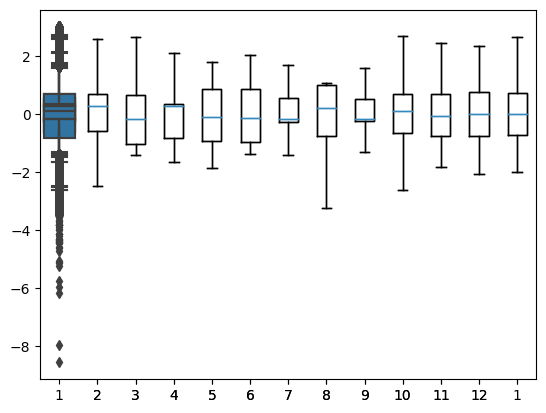

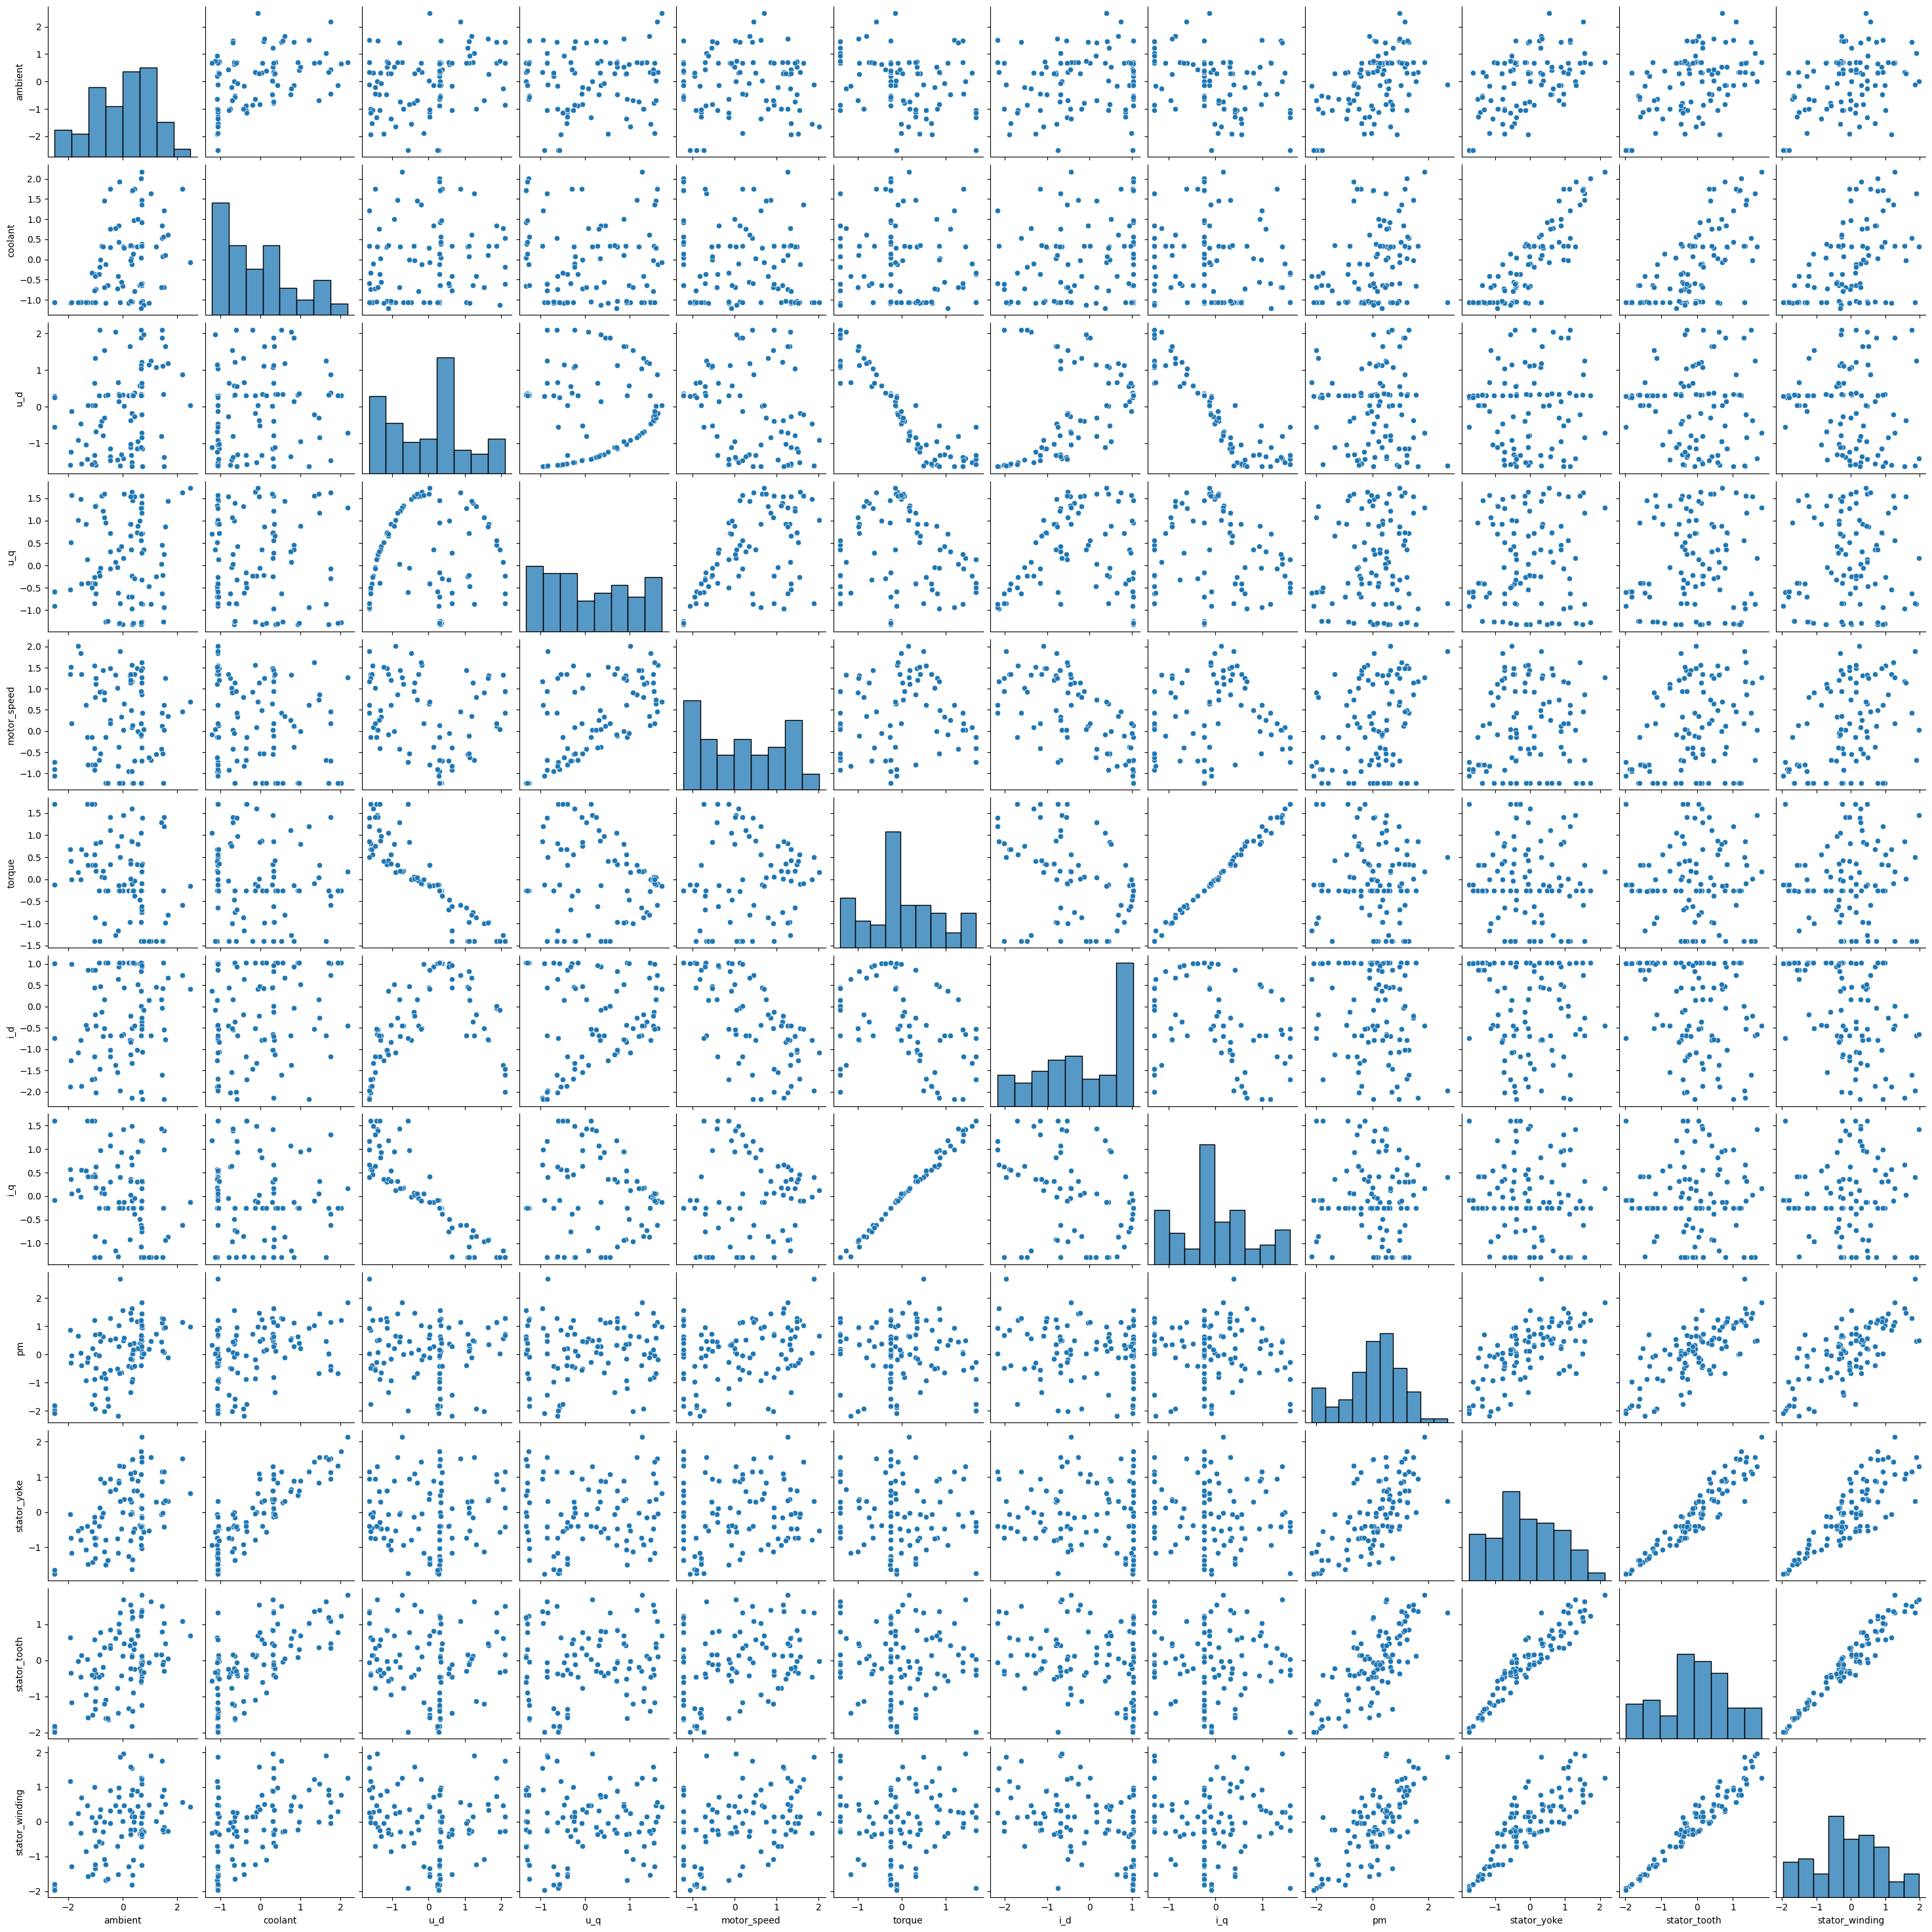

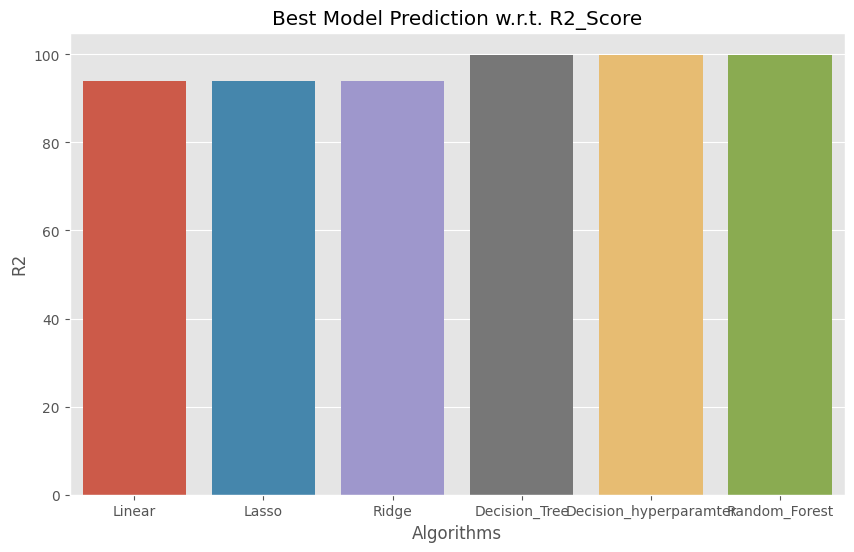

In [127]:
plt.style.use('ggplot') 
plt.figure(figsize=(10,6))
sns.barplot(x='Algorithms',y='R2',data=models)
plt.title("Best Model Prediction w.r.t. R2_Score") 
plt.show()

# Algorithm vs Training Accuracy

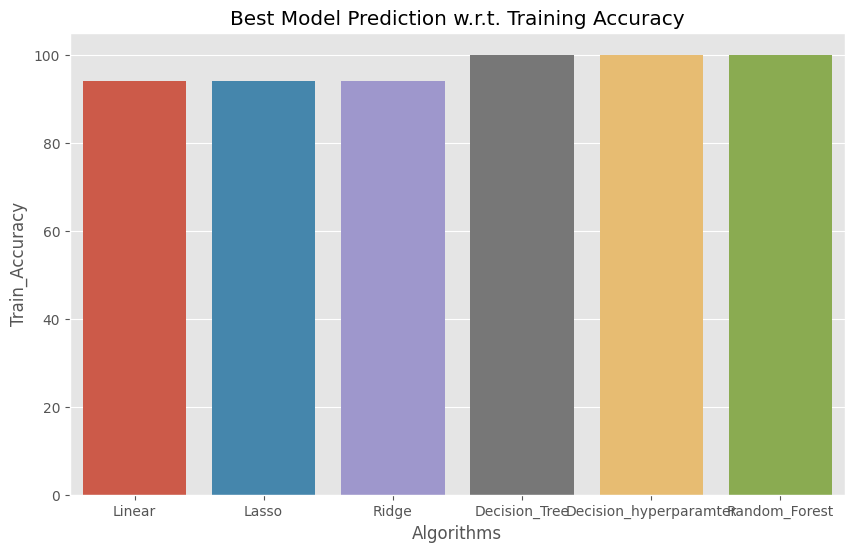

In [128]:
plt.style.use('ggplot') 
plt.figure(figsize=(10,6))
sns.barplot(x='Algorithms',y='Train_Accuracy',data=models)
plt.title("Best Model Prediction w.r.t. Training Accuracy")
plt.show()

# Algorithm vs Test Accuracy

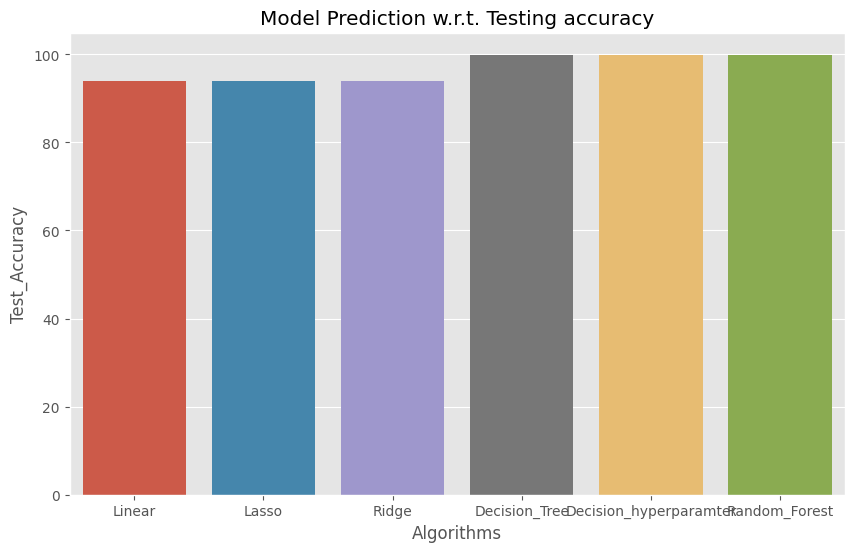

In [129]:
plt.style.use('ggplot') 
plt.figure(figsize=(10,6))
sns.barplot(x='Algorithms',y='Test_Accuracy',data=models)
plt.title("Model Prediction w.r.t. Testing accuracy")
plt.show()


# DEPLOYMENT

In [141]:
import pickle

In [142]:
filename = 'new_trained_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

In [143]:
loaded_model = pickle.load(open( 'new_trained_model.sav' , 'rb'))

In [144]:
input_data = (0.22,0.576,0.567,0.424,0.786,0.872,0.954,0.4856,0.5658,0.8895,0.9999)

input_data_asarray = np.asarray(input_data)

input_data_reshaped = input_data_asarray.reshape(1,-1)


In [145]:
prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

[-0.44502165]
